In [2]:
# 📌 Install dependencies (run only once)
!pip install numpy pandas matplotlib seaborn scikit-learn


✅ KNN Test Accuracy: 80.40%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       331
           1       0.95      0.94      0.94       432
           2       0.95      1.00      0.97       310
           3       0.76      0.95      0.85       245
           4       0.78      0.97      0.86       498
           5       0.87      0.91      0.89       247
           6       0.91      0.94      0.92       348
           7       0.95      0.94      0.94       436
           8       0.87      0.65      0.75       288
          10       0.85      0.59      0.70       331
          11       0.93      0.89      0.91       209
          12       0.81      0.49      0.61       394
          13       0.78      0.59      0.67       291
          14       1.00      0.88      0.94       246
          15       1.00      1.00      1.00       347
          16       0.95      1.00      0.97       164
          17       0.32  

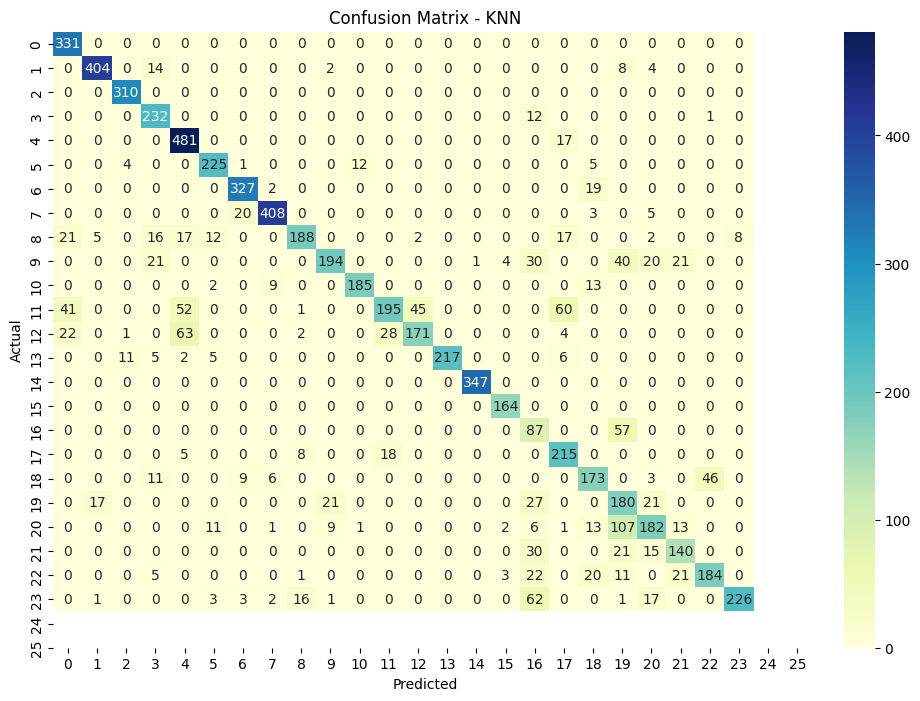

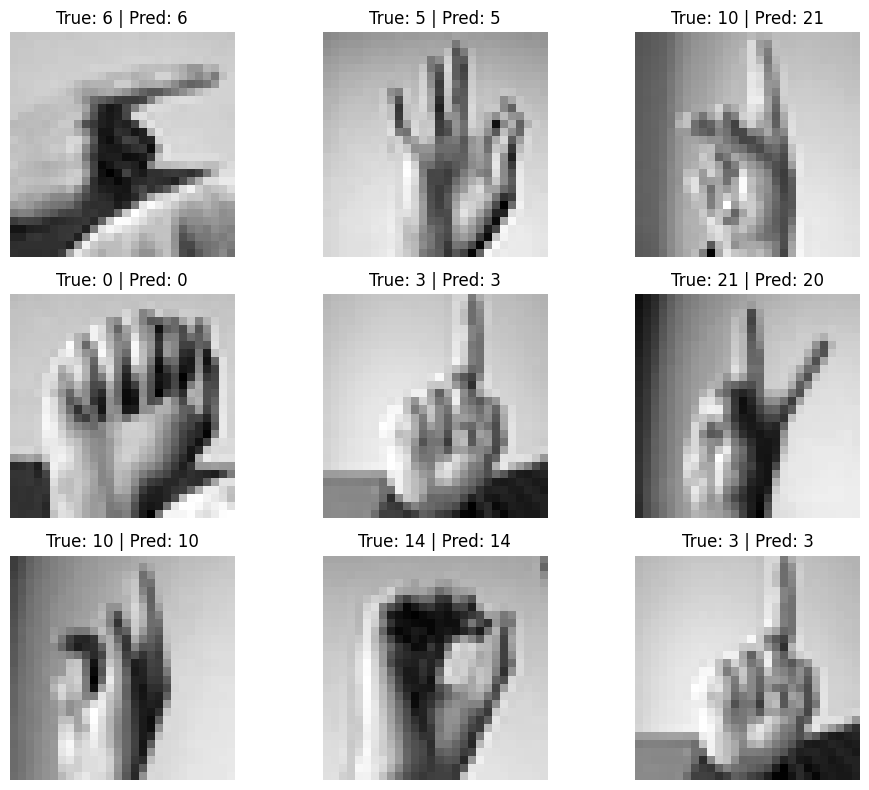

In [3]:
# 📌 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# 📌 File paths
train_path = r"C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_04\sign_mnist_train.csv"
test_path  = r"C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_04\sign_mnist_test.csv"

# 📌 Load dataset
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# 📌 Prepare data
X_train = train_df.drop('label', axis=1) / 255.0
y_train = train_df['label']

X_test = test_df.drop('label', axis=1) / 255.0
y_test = test_df['label']

# 📌 Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 📌 Predict and evaluate
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ KNN Test Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Plot and save confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=list(range(26)), yticklabels=list(range(26)))
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_knn.png")
plt.show()

# 📌 Visualize a few predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    img = np.array(X_test.iloc[i]).reshape(28, 28)
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test.iloc[i]} | Pred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig("sample_predictions_knn.png")
plt.show()